In [1]:
import pandas as pd
import numpy as np

In [2]:

dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].to_numpy().astype('float32')
Y = dataset.iloc[:,[4]].to_numpy().astype('float32')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

/Users/CYJ/anaconda/envs/machineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [6]:
Y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[61  7]
 [ 5 27]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


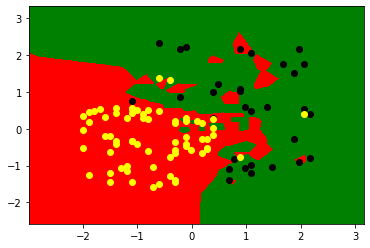

In [10]:
#可视化
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set,Y_set = X_test,Y_test
#生成网格状的数据 判断年龄与收入对结果的影响
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step = 0.01),
                     np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step = 0.01))

#生成一个测试矩阵
X1_X2_test = np.array([X1.ravel(),X2.ravel()]).T
#预测矩阵
Y_PRED = classifier.predict(X1_X2_test).reshape(X1.shape)
plt.contourf(X1,X2,Y_PRED, cmap=ListedColormap(('red', 'green')))




#将原始数据投射到图上，直观的看出模型的准确性
one_index_list=[]
zero_index_list=[]

for i in range( Y_set.size ):
    one_index_list.append((Y_set==1)[i][0])
    zero_index_list.append((Y_set==0)[i][0])
    
one_result = list( [X_set[one_index_list,0],X_set[one_index_list,1]])
zero_result = list( [X_set[zero_index_list,0],X_set[zero_index_list,1]])

plt.scatter(one_result[0],one_result[1], c = ListedColormap(('yellow', 'black'))(1), label=1)
plt.scatter(zero_result[0],zero_result[1],c = ListedColormap(('yellow', 'black'))(0), label=0)


In [9]:
print(classifier.kneighbors_graph)
classifier.weights

<bound method KNeighborsMixin.kneighbors_graph of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')>


'uniform'